## Importing libraries and data

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

# Set plot style
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [38]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart_disease_uci.csv')

## Feature of dataset

* age → Age of the patient (years).

* sex → Patient’s gender (1 = female, 0 = male).

* cp → Type of chest pain (3 = asymptomatic, 1 = atypical angina, 2 = non-anginal pain, 0 = typical angina).

* trestbps → Resting blood pressure in mm Hg.

* chol → Serum cholesterol level (mg/dl).

* fbs → Fasting blood sugar > 120 mg/dl (1 = true, 0 = false).

* restecg → Resting ECG results (0 = normal, 1 = ST-T abnormality, 2 = left ventricular hypertrophy).

* thalach → Maximum heart rate achieved.

* exang → Exercise-induced angina (1 = yes, 0 = no).

* oldpeak → ST depression induced by exercise relative to rest.

* slope → Slope of the peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping).

* ca → Number of major vessels (0–3) colored by fluoroscopy.

* thal → Thalassemia test result (3 = normal, 6 = fixed defect, 7 = reversible defect).

* num → Target: presence of heart disease (0 = no, 1–4 = disease severity).





## Data Prepartion
**Data Analysis**

In [39]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [40]:
df.shape

(920, 16)

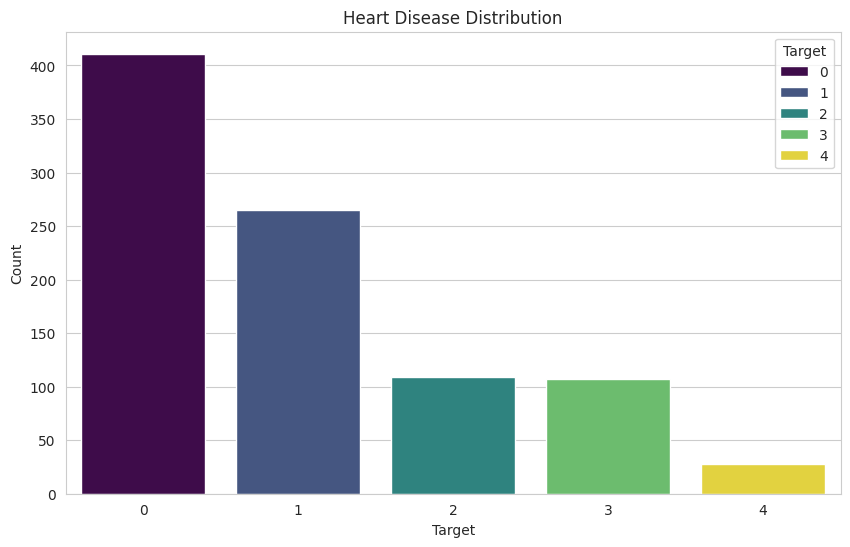

In [76]:
plt.figure(figsize=(10, 6))
sns.countplot(x='num', data=df, palette='viridis', hue='num')
plt.title('Heart Disease Distribution')
plt.xlabel('Target')
plt.ylabel('Count')
plt.legend(title='Target')
plt.savefig('heart_disease_distribution.png')
plt.show()

**this graph showing that more number of patient have disease**

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [43]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [44]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


**How Male and Female have heart disease from total number of Male or Female?**

In [45]:
df['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [46]:
df_male=df[df['sex']=='Male']
df_female=df[df['sex']=='Female']
affected_male=len(df_male[df_male['num']==1])+len(df_male[df_male['num']==2])+len(df_male[df_male['num']==3])+len(df_male[df_male['num']==4])
affected_female=len(df_female[df_female['num']==1])+len(df_female[df_female['num']==2])+len(df_female[df_female['num']==3])+len(df_female[df_female['num']==4])
fig = make_subplots(rows=1,
                    cols=2,
                    specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['Male', 'Female']
                    )
fig.add_trace(go.Pie(
    labels=['Total_Male', 'Affected_Male'],
    values=[len(df_male)-affected_male, affected_male],
    name='Male'), 1, 1)
fig.add_trace(go.Pie(
    labels=['Total_Female', 'Affected_Female'],
    values=[len(df_female)-affected_female, affected_female],
    name='Female'), 1, 2)
fig.update_layout(title_text="Disease Distribution by Gender")
fig.show()

**How many people are affected by place**

In [47]:
df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [48]:
from re import sub
df_Cleveland=df[df['dataset']=='Cleveland']
df_Hungary=df[df['dataset']=='Hungary']
df_Switzerland=df[df['dataset']=='Switzerland']
df_VA_Long_Beach=df[df['dataset']=='VA Long Beach']
affected_Cleveland=len(df_Cleveland[df_Cleveland['num']==1])+len(df_Cleveland[df_Cleveland['num']==2])+len(df_Cleveland[df_Cleveland['num']==3])+len(df_Cleveland[df_Cleveland['num']==4])
affected_Hungary=len(df_Hungary[df_Hungary['num']==1])+len(df_Hungary[df_Hungary['num']==2])+len(df_Hungary[df_Hungary['num']==3])+len(df_Hungary[df_Hungary['num']==4])
affected_Switzerland=len(df_Switzerland[df_Switzerland['num']==1])+len(df_Switzerland[df_Switzerland['num']==2])+len(df_Switzerland[df_Switzerland['num']==3])+len(df_Switzerland[df_Switzerland['num']==4])
affected_VA_Long_Beach=len(df_VA_Long_Beach[df_VA_Long_Beach['num']==1])+len(df_VA_Long_Beach[df_VA_Long_Beach['num']==2])+len(df_VA_Long_Beach[df_VA_Long_Beach['num']==3])+len(df_VA_Long_Beach[df_VA_Long_Beach['num']==4])
fig=make_subplots(rows=1, cols=4,
                  specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}]],
                  subplot_titles=['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach']
                  )
fig.add_trace(go.Pie(
    labels=['Total_Cleveland', 'Affected_Cleveland'],
    values=[len(df_Cleveland)-affected_Cleveland, affected_Cleveland],
    name='Cleveland'), 1, 1)
fig.add_trace(go.Pie(
    labels=['Total_Hungary', 'Affected_Hungary'],
    values=[len(df_Hungary)-affected_Hungary, affected_Hungary],
    name='Hungary'), 1, 2)
fig.add_trace(go.Pie(
    labels=['Total_Switzerland', 'Affected_Switzerland'],
    values=[len(df_Switzerland)-affected_Switzerland, affected_Switzerland],
    name='Switzerland'), 1, 3)
fig.add_trace(go.Pie(
    labels=['Total_VA_Long_Beach', 'Affected_VA_Long_Beach'],
    values=[len(df_VA_Long_Beach)-affected_VA_Long_Beach, affected_VA_Long_Beach],
    name='VA_Long_Beach'), 1, 4)
fig.update_layout(title_text="Disease Distribution by Place")
fig.show()


It has 4 categorical values (0–3) that represent the type of chest pain:


*  3 → Typical angina (chest pain related to decreased blood supply to the heart)

*  1 → Atypical angina (chest pain not related to heart problems)

* 2 → Non-anginal pain (chest pain not due to the heart)

* 0 → Asymptomatic (no chest pain at all)

In [49]:
dict_cp=df['cp'].value_counts().to_list()
names=df['cp'].value_counts().index.to_list()
fig = px.pie(
    values=dict_cp,
    names=names,
    title='Chest Pain Types',
    hole=0.5
)
fig.show()

In [50]:
df['trestbps']=df['trestbps'].fillna(df['trestbps'].mean())

In [51]:
df['chol'].fillna(df['chol'].median(), inplace=True)
df['fbs'].fillna(df['fbs'].mode()[0], inplace=True)
df['restecg'].fillna(df['restecg'].mode()[0], inplace=True)
df['thalch'].fillna(df['thalch'].mean(), inplace=True)
df['exang'].fillna(df['exang'].mode()[0], inplace=True)
df['oldpeak'].fillna(df['oldpeak'].mean(), inplace=True)
df['slope'].fillna(df['slope'].mode()[0], inplace=True)
df['ca'].fillna(df['ca'].mode()[0], inplace=True)
df['thal'].fillna(df['thal'].mode()[0], inplace=True)

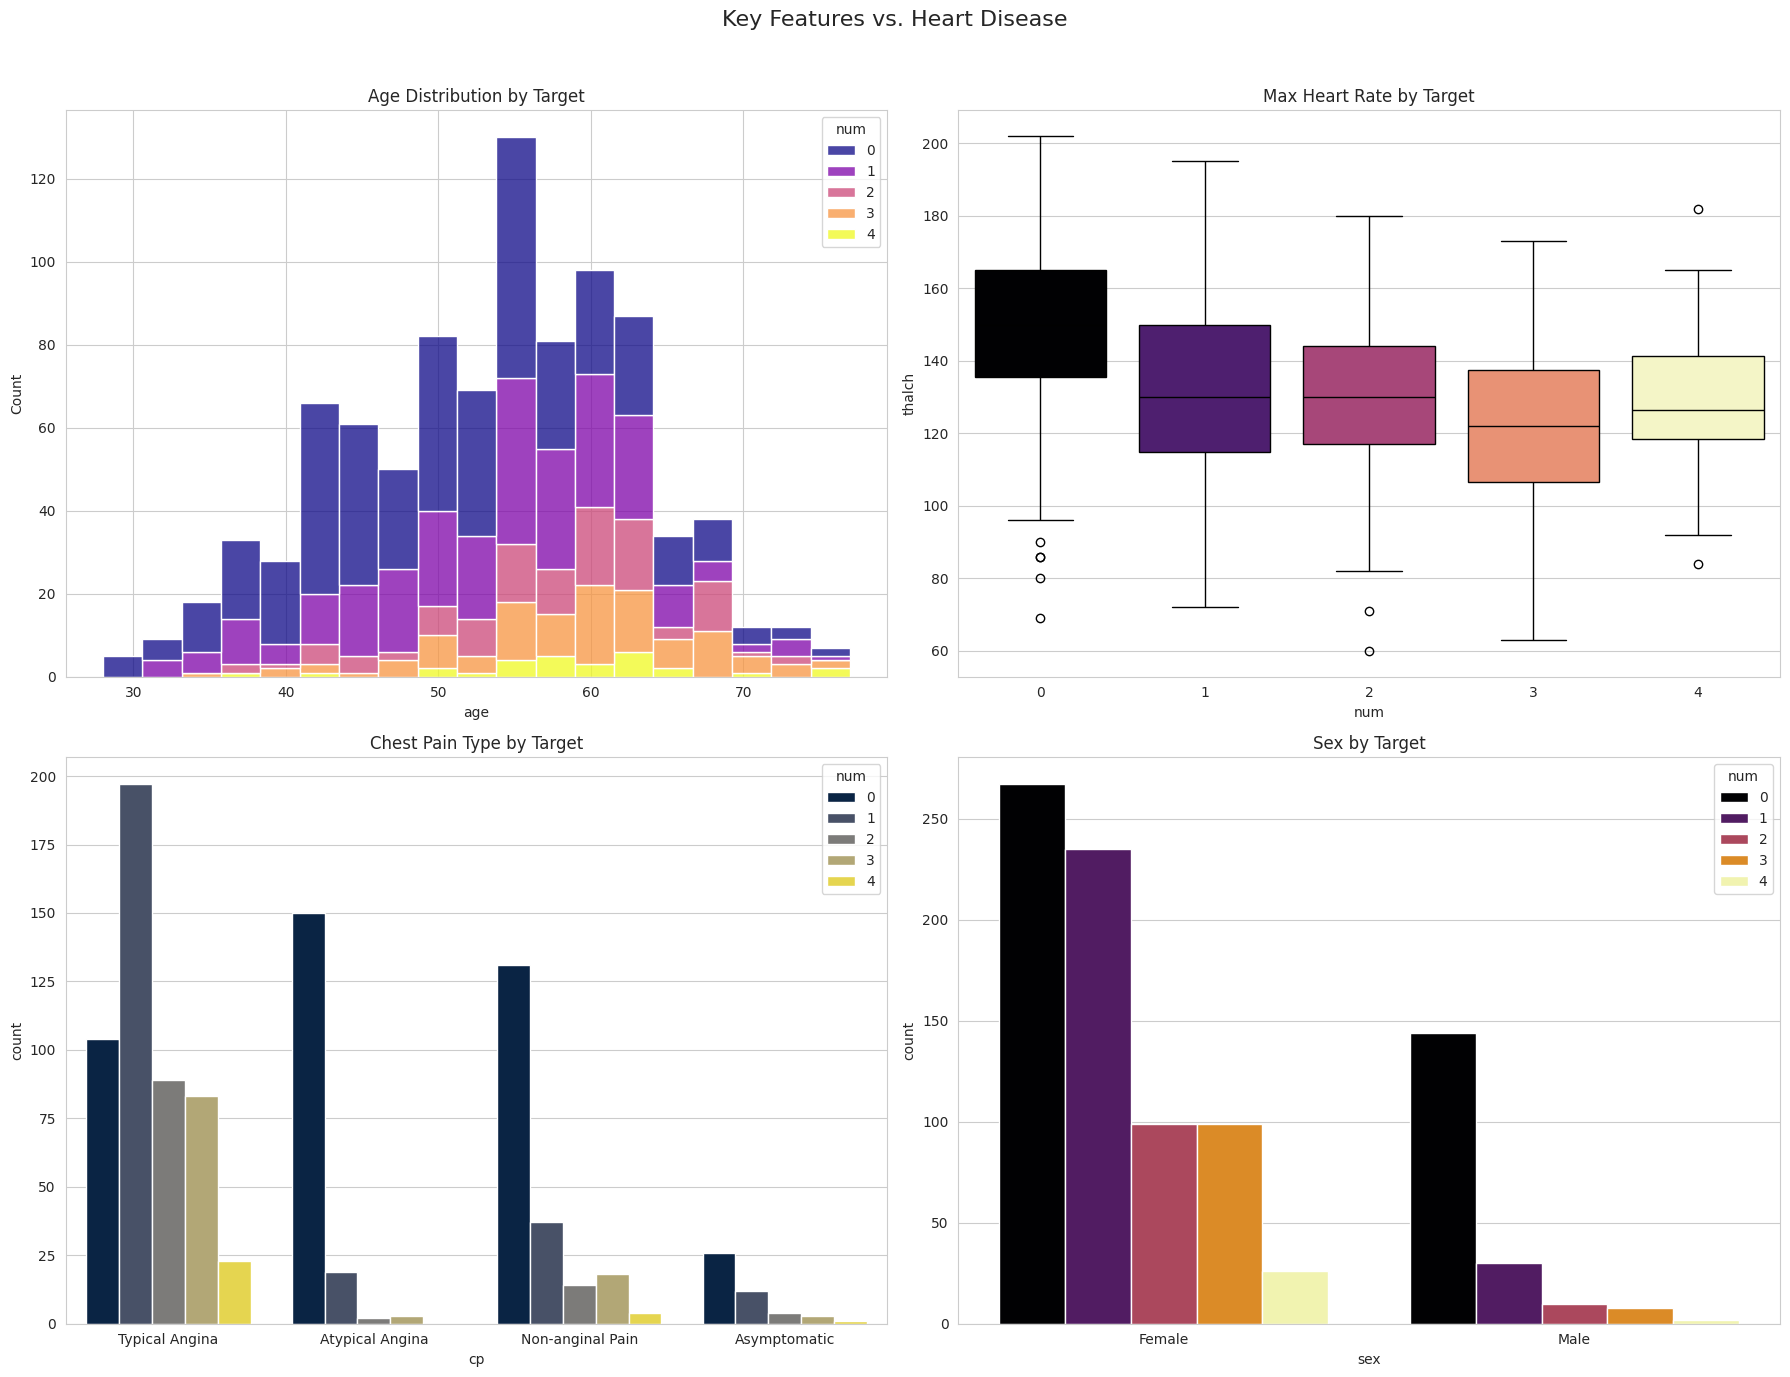

In [77]:
# Let's visualize the relationship between key features and the target
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Key Features vs. Heart Disease', fontsize=16)

# Age vs. Target
sns.histplot(ax=axes[0, 0], data=df, x='age', hue='num', multiple='stack', palette='plasma').set_title('Age Distribution by Target')

# Max Heart Rate vs. Target
sns.boxplot(ax=axes[0, 1], data=df, x='num', y='thalch', palette='magma', hue='num', legend=False).set_title('Max Heart Rate by Target')

# Chest Pain Type vs. Target
cp_plot = sns.countplot(ax=axes[1, 0], data=df, x='cp', hue='num', palette='cividis')
cp_plot.set_title('Chest Pain Type by Target')
cp_plot.set_xticks(range(len(df['cp'].unique())))
cp_plot.set_xticklabels(['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'])

# Sex vs. Target
sex_plot = sns.countplot(ax=axes[1, 1], data=df, x='sex', hue='num', palette='inferno')
sex_plot.set_title('Sex by Target')
sex_plot.set_xticks(range(len(df['sex'].unique())))
sex_plot.set_xticklabels(['Female', 'Male'])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('key_features_vs_target.png')
plt.show()

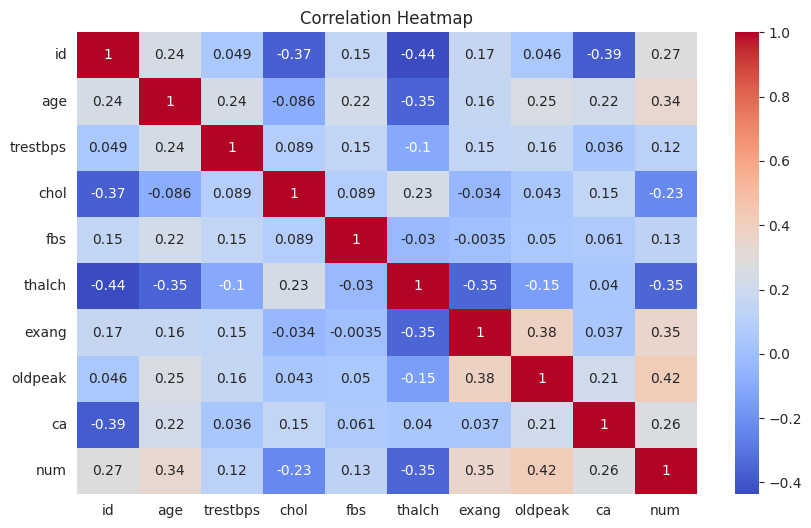

In [53]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Model Building and Training

**Feature Engineering**

In [54]:
model_df=df

In [55]:
model_df['cp'].unique()

array(['typical angina', 'asymptomatic', 'non-anginal', 'atypical angina'],
      dtype=object)

In [56]:
model_df.drop(columns=['dataset'], inplace=True)
model_df.drop(columns=['id'], inplace=True)
model_df['sex']=model_df['sex'].map({'Male':0, 'Female':1})
model_df['fbs']=model_df['fbs'].map({False:0, True:1})
model_df['cp']=model_df['cp'].map({'asymptomatic':3, 'atypical angina':1, 'non-anginal':2, 'typical angina':0})
model_df['restecg']=model_df['restecg'].map({'lv hypertrophy':2, 'normal':0, 'st-t abnormality':1})
model_df['exang']=model_df['exang'].map({False:0, True:1})
model_df['slope']=model_df['slope'].map({'upsloping':0, 'flat':1, 'downsloping':2})
model_df['thal']=model_df['thal'].map({'normal':0, 'fixed defect':1, 'reversable defect':2})

In [59]:
model_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,0,3,145.000000,233.0,1,0,150.000000,0,2.300000,2,0.0,1,0
1,67,0,0,160.000000,286.0,0,0,108.000000,1,1.500000,1,3.0,0,2
2,67,0,0,120.000000,229.0,0,0,129.000000,1,2.600000,1,2.0,2,1
3,37,0,2,130.000000,250.0,0,1,187.000000,0,3.500000,2,0.0,0,0
4,41,1,1,130.000000,204.0,0,0,172.000000,0,1.400000,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,1,0,127.000000,333.0,1,2,154.000000,0,0.000000,1,0.0,0,1
916,62,0,3,132.132404,139.0,0,2,137.545665,0,0.878788,1,0.0,0,0
917,55,0,0,122.000000,223.0,1,2,100.000000,0,0.000000,1,0.0,1,2
918,58,0,0,132.132404,385.0,1,0,137.545665,0,0.878788,1,0.0,0,0


In [61]:
x = model_df.drop(columns=['num'])
y = model_df['num']

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [67]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    class_weight='balanced'
)

In [69]:
rf.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [71]:
y_pred = rf.predict(x_test)

In [72]:
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy: 0.592391304347826

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.93      0.81        75
           1       0.53      0.52      0.52        54
           2       0.31      0.16      0.21        25
           3       0.33      0.23      0.27        26
           4       0.33      0.25      0.29         4

    accuracy                           0.59       184
   macro avg       0.44      0.42      0.42       184
weighted avg       0.55      0.59      0.56       184



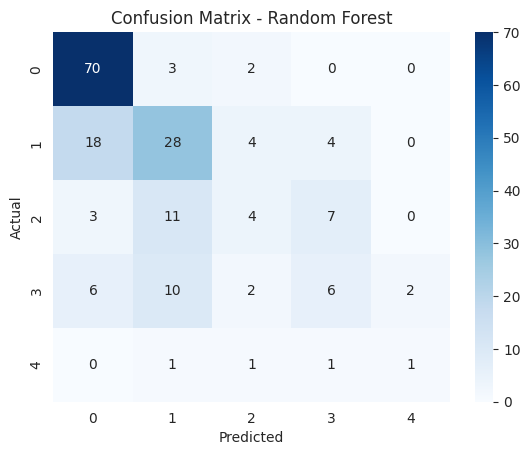

In [73]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

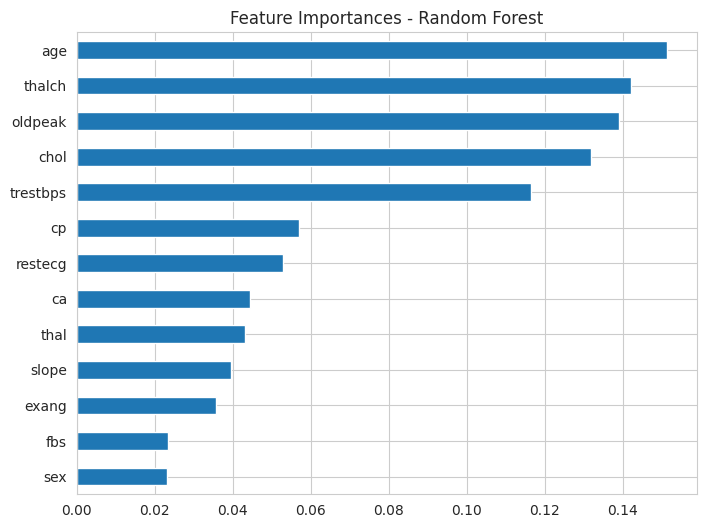

In [75]:
importances = pd.Series(rf.feature_importances_, index=x.columns)
importances.sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Feature Importances - Random Forest")
plt.show()